In [ ]:
#Reduction 

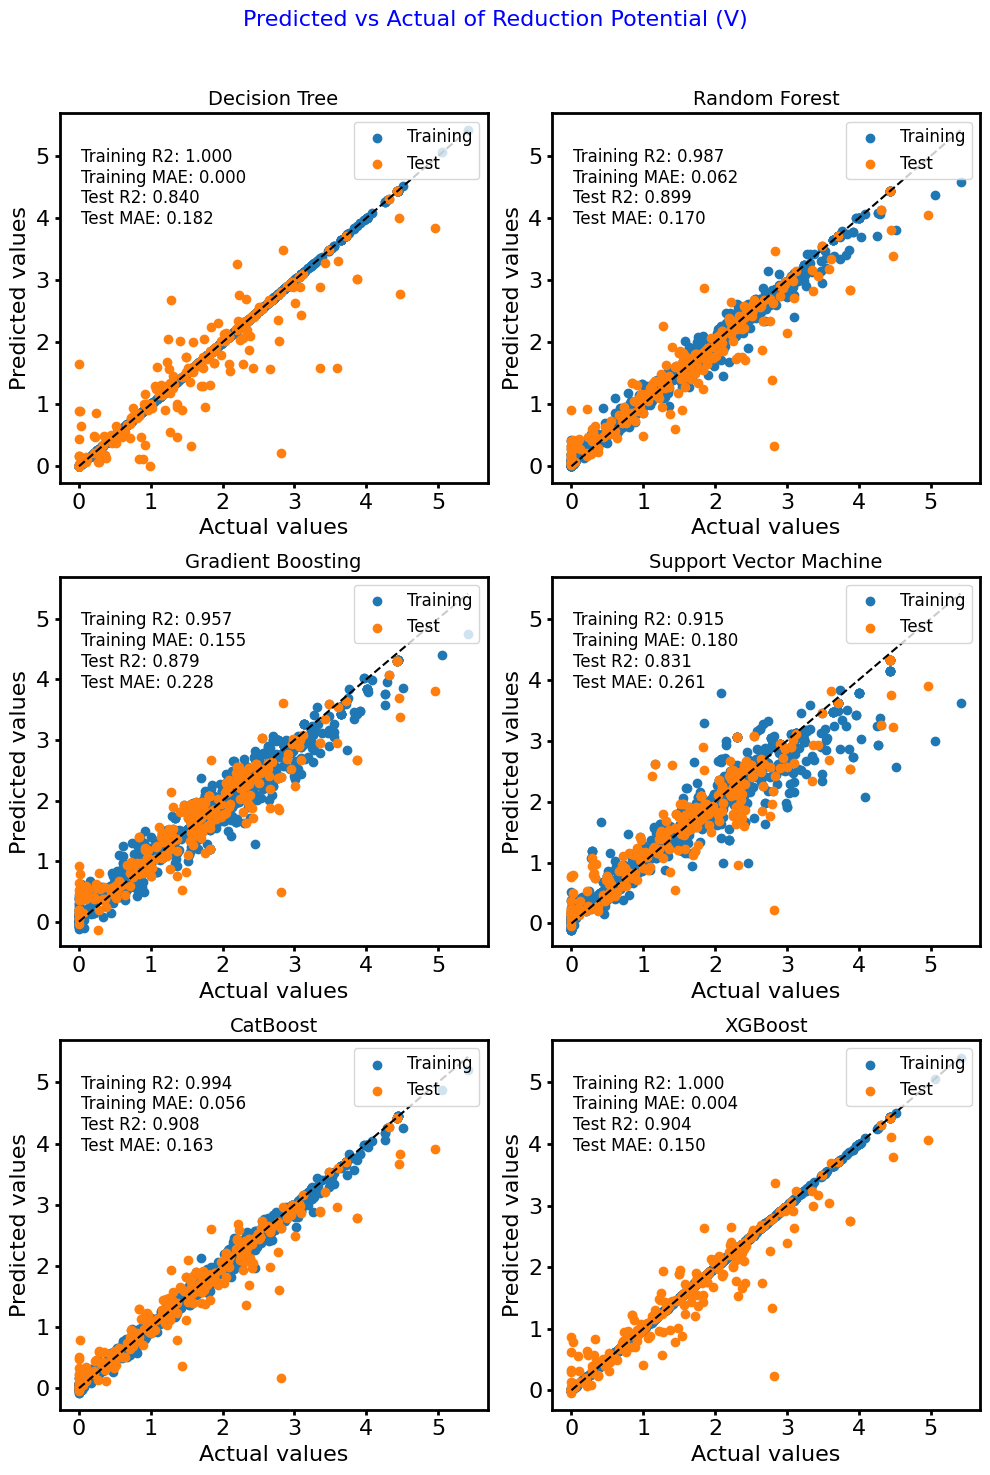

In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from matplotlib.colors import LinearSegmentedColormap

# Load data
df = pd.read_csv('data.csv') 

 
X = df.drop(columns=['material_ID','formula','Li_Chempot_Min','Li_Chempot_Max'])  # all columns except 'formula' and 'ESW_Red_(V)'
y = df['Li_Chempot_Max'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machine', SVR()),
    ('CatBoost', CatBoostRegressor(iterations=500, verbose=False)),
    ('XGBoost', xgb.XGBRegressor())
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    results.append((name, mse_train, mae_train, r2_train, mape_train, mse_test, mae_test, r2_test, mape_test))
 
# Plot results
fig, axs = plt.subplots(3, 2, figsize=(10, 15)) 
for i, (name, _, _, _, _, _, _, _, _) in enumerate(results):
    ax = axs[i // 2, i % 2]   
    model, model_obj = models[i]
    model_obj.fit(X_train_scaled, y_train)
    y_train_pred = model_obj.predict(X_train_scaled)
    y_test_pred = model_obj.predict(X_test_scaled)
    ax.scatter(y_train, y_train_pred, label='Training')
    ax.scatter(y_test, y_test_pred, label='Test')
    ax.set_xlabel('Actual values', fontsize=16)   
    ax.set_ylabel('Predicted values', fontsize=16)  
    ax.set_title(f'{name}', fontsize=14)   
    ax.legend(loc='upper right', fontsize=12)   
    ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--', label='y=x')
    ax.text(0.05, 0.7, f'Training R2: {r2_score(y_train, y_train_pred):.3f}\nTraining MAE: {mean_absolute_error(y_train, y_train_pred):.3f}\nTest R2: {r2_score(y_test, y_test_pred):.3f}\nTest MAE: {mean_absolute_error(y_test, y_test_pred):.3f}', transform=ax.transAxes, fontsize=12)  # Increased text size to 14
    ax.tick_params(axis='both', labelsize=16, width=2)   
    ax.spines['top'].set_linewidth(2)   
    ax.spines['right'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2) 
    ax.spines['left'].set_linewidth(2)  
plt.tight_layout()
fig.suptitle('Predicted vs Actual of Reduction Potential (V)', fontsize=16 ,color='blue')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('6_model_Redox_Li_pred_vs_actual.png', dpi=300)
plt.show()

In [ ]:
# oxidation

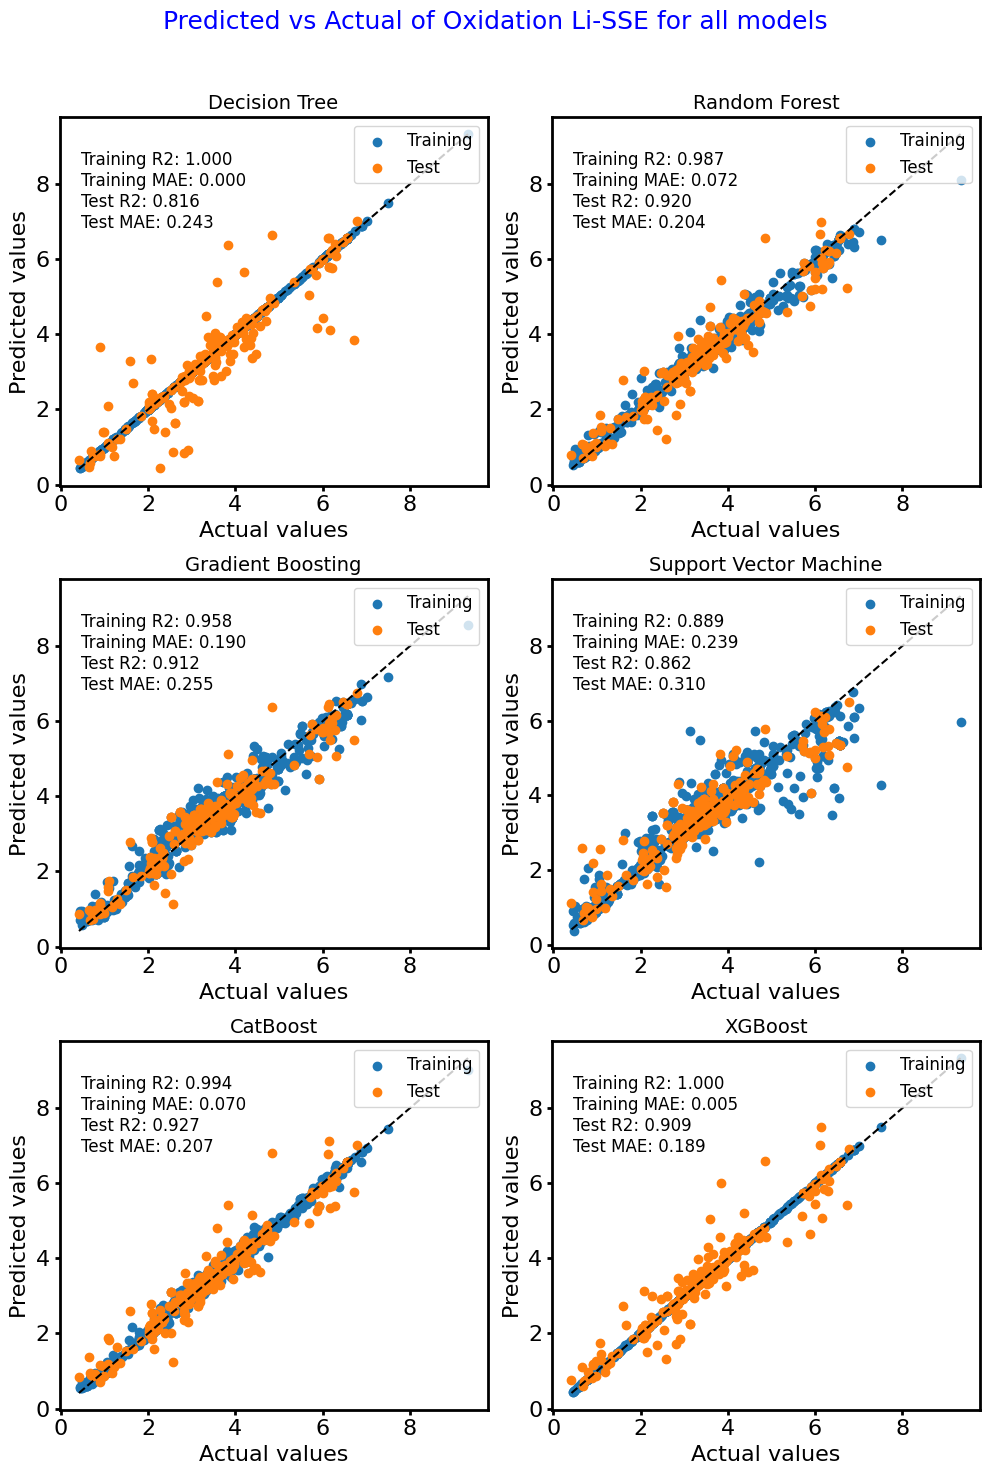

In [7]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from matplotlib.colors import LinearSegmentedColormap


 
df = pd.read_csv('data.csv')
df.columns = df.columns.str.replace('MagpieData ', '')


X = df.drop(columns=['material_ID','formula','Li_Chempot_Min','Li_Chempot_Max'])  # all columns except 'formula' and 'ESW_Red_(V)'
y = df['Li_Chempot_Min'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machine', SVR()),
    ('CatBoost', CatBoostRegressor(iterations=500, verbose=False)),
    ('XGBoost', xgb.XGBRegressor())
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    results.append((name, mse_train, mae_train, r2_train, mape_train, mse_test, mae_test, r2_test, mape_test))



# Plot results
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjusted figure size to maintain aspect ratio
for i, (name, _, _, _, _, _, _, _, _) in enumerate(results):
    ax = axs[i // 2, i % 2]  
    model, model_obj = models[i]
    model_obj.fit(X_train_scaled, y_train)
    y_train_pred = model_obj.predict(X_train_scaled)
    y_test_pred = model_obj.predict(X_test_scaled)
    ax.scatter(y_train, y_train_pred, label='Training')
    ax.scatter(y_test, y_test_pred, label='Test')
    ax.set_xlabel('Actual values', fontsize=16)  
    ax.set_ylabel('Predicted values', fontsize=16)  
    ax.set_title(f'{name}', fontsize=14)  
    ax.legend(loc='upper right', fontsize=12)  
    ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--', label='y=x')
    ax.text(0.05, 0.7, f'Training R2: {r2_score(y_train, y_train_pred):.3f}\nTraining MAE: {mean_absolute_error(y_train, y_train_pred):.3f}\nTest R2: {r2_score(y_test, y_test_pred):.3f}\nTest MAE: {mean_absolute_error(y_test, y_test_pred):.3f}', transform=ax.transAxes, fontsize=12)  # Increased text size to 14
    ax.tick_params(axis='both', labelsize=16, width=2) 
    ax.spines['top'].set_linewidth(2)  
    ax.spines['right'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)  
    ax.spines['left'].set_linewidth(2)  
plt.tight_layout()
fig.suptitle('Predicted vs Actual of Oxidation Li-SSE for all models',  fontsize=18 ,color='blue')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('6_model_Oxi_Li_pred_vs_actual.png', dpi=300)
plt.show()

# 